In [119]:
# multiple time series analysis
# 20160724
# Sean Chang 

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import os  
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(style="darkgrid")

from datetime import datetime
import matplotlib.pyplot as plt 
os.chdir('/home/sc268/Dropbox/codes/2016_timeseries_currency/')
print os.getcwd()

OSError: [Errno 2] No such file or directory: '/home/sc268/Dropbox/codes/2016_timeseries_currency/'

In [140]:
# data filter
# raw data is from http://www.forextester.com/data/datasources

def clean_up_df(dat):
    print dat.head()
    # delete unnecessary columns
    dat = dat.ix[:, 0:4]
    
    # filter:: only consider 8 am in each day
    dat = dat.loc[[time == 80000 for time in dat['<TIME>']]].reset_index(drop=True)
    
    # create timestamp
    dat['time'] = map(lambda dd, tt: datetime.strptime(str(dd)+str(tt),'%Y%m%d%H%M%S'), dat['<DTYYYYMMDD>'], dat['<TIME>'])
    
    # rename 
    dat.rename(columns={'<TICKER>':'currency', '<OPEN>':'rate'}, inplace=True)
    
    # delete unused columns
    del dat['<DTYYYYMMDD>'], dat['<TIME>']
    
    print dat.head()
    return dat

usdjpy =pd.read_csv('raw_data/USDJPY.txt')
usdjpy = clean_up_df(usdjpy)
#usdjpy.to_csv('new_usdjpy.csv')

import os
foldername = "raw_data/"

for file in os.listdir(foldername):
    filename = os.path.splitext(file)[0]
    print file, filename
    dat = pd.read_csv('raw_data/' + file)
    dat = clean_up_df(dat)
    dat.to_csv('data/' + filename + '.csv')

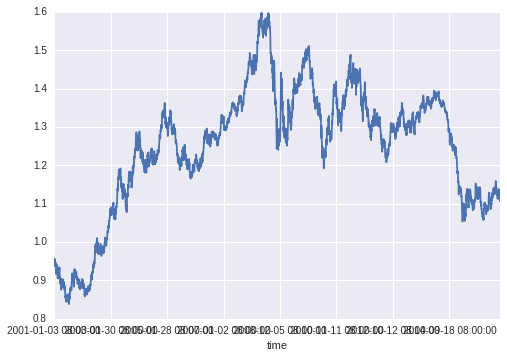

In [3]:
dat = pd.read_csv('data/EURUSD.csv')
EUR = pd.Series(list(dat.rate), index = dat.time)
EUR.plot()

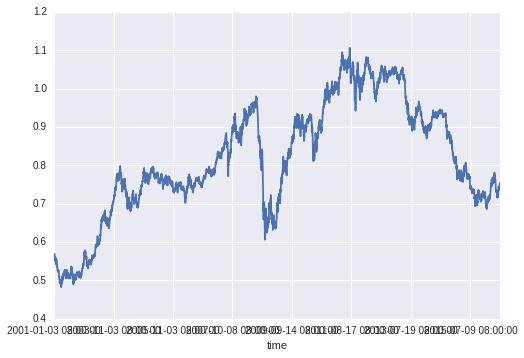

In [4]:
dat = pd.read_csv('data/AUDUSD.csv')
AUD = pd.Series(list(dat.rate), index = dat.time)
AUD.plot()

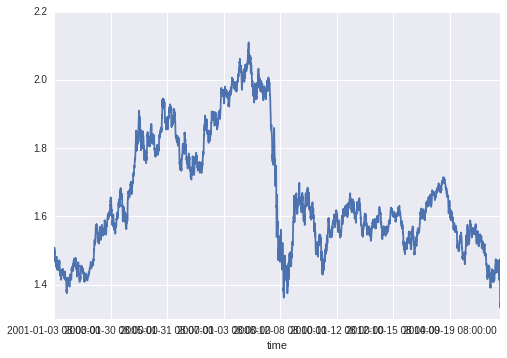

In [5]:
dat = pd.read_csv('data/GBPUSD.csv')
GBP = pd.Series(list(dat.rate), index = dat.time)
GBP.plot()

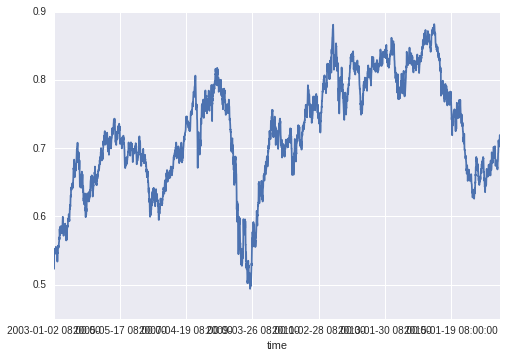

In [6]:
dat = pd.read_csv('data/NZDUSD.csv')
NZD= pd.Series(list(dat.rate), index = dat.time)
NZD.plot()

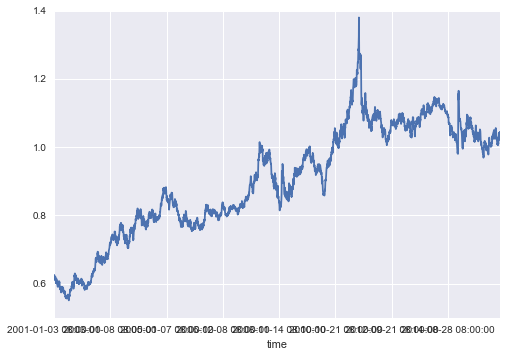

In [15]:
dat = pd.read_csv('data/CHFUSD.csv')
#dat.rate = [1.0/rate for rate in dat.rate]
#dat.to_csv('data/CHFUSD.csv', index = False)
CHF= pd.Series(list(dat.rate), index = dat.time)
CHF.plot()

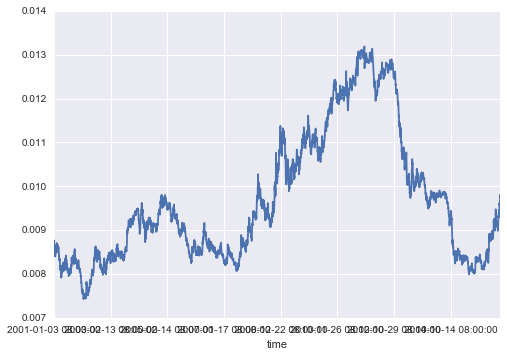

In [14]:
dat = pd.read_csv('data/JPYUSD.csv')
#dat.rate = [1.0/rate for rate in dat.rate]
#dat.to_csv('data/JPYUSD.csv', index = False)
JPY= pd.Series(list(dat.rate), index = dat.time)
JPY.plot()

In [9]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.charts import TimeSeries
#from bokeh.models import Range1d
from IPython.display import display
from subprocess import call
TOOLS = "pan, box_zoom, reset, save, box_select"
output_notebook()

Loading BokehJS ...

In [31]:
currency = 'JPY'
dat['rate'] = JPY.values
dat['time'] = JPY.index
dat.time = pd.to_datetime(dat.time.apply(lambda x: str(x).split(' 08:00:00')[0]))

p = TimeSeries(dat, x='time', y='rate',title = currency, ylabel='exchange rate', xlabel='date')
show(p)